<a href="https://colab.research.google.com/github/SAKSHIDHYANI/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

### **We will be extracting the hidden patterns in the data to get the information related to terrorist attacks. Before that we will be performing data wrangling to make data more understandable and clear which will help in doing the proper analysis.**


*   Importing librares
*   Treating missing values
*   Treating null values
*   Renaming columns







# *Importing Libraries* 

In [ ]:
#importing required python pacakges and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# *Loading and previewing/understanding data*

In [ ]:
# Reading data and storing as dataframe 
GTD_data = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project 1/Global Terrorism Data.csv",encoding = "ISO-8859-1")
GTD_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
# Understanding data structure 
GTD_data.shape

(181691, 135)

In [ ]:
GTD_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
GTD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


# *Treating missing and Null values*

In [ ]:
# Checking columns with a very high count of null values as compared to the total records(ratio : Null values count/ total count < 0.5 (approx.)).
pd.set_option('display.max_rows',None)
cols = GTD_data.isna().sum()
cols_df = cols.to_frame()
cols_df.rename(columns={0:"Null values count"},inplace=True)
cols_high_nullvalues_count = cols_df[cols_df["Null values count"] > 100000]
cols_high_nullvalues_count


,Null values count
approxdate,172452
resolution,179471
location,126196
alternative,152680
alternative_txt,152680
attacktype2,175377
attacktype2_txt,175377
attacktype3,181263
attacktype3_txt,181263
targtype2,170547


In [ ]:
# 77 rows have large number of null values (more than 100000)
cols_high_nullvalues_count.shape

(77, 1)

In [ ]:
GTDdata_copy = GTD_data.copy()
GTD_data.drop_duplicates(keep = False, inplace = True)                     

In [ ]:
#copying the original data into GTDdata to keep an original copy of the data

cols_high_nullvalues_count['variables'] = cols_high_nullvalues_count.index
cols_high_nullvalues_count.reset_index(inplace=True,drop=True)
cols_high_nullvalues_count



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Null values count,variables
0,172452,approxdate
1,179471,resolution
2,126196,location
3,152680,alternative
4,152680,alternative_txt
5,175377,attacktype2
6,175377,attacktype2_txt
7,181263,attacktype3
8,181263,attacktype3_txt
9,170547,targtype2


In [ ]:
# Dropping columns having a large number of missing values
GTD_data.drop(columns = list(cols_high_nullvalues_count['variables']),inplace=True)

In [ ]:
# Dropping the columns which are not required
cols = ['eventid','country','region','iday','specificity','vicinity','summary','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','weapsubtype1','weapdetail','scite1','dbsource','latitude','longitude']
GTD_data.drop(columns = cols,axis = 1,inplace = True)

In [ ]:
# Number of columns left after dropping columns in previous steps
GTD_data.shape

(181691, 40)

In [ ]:
# Function for Checking remaining null values
def finding_null_values(GTD_data):
  rem_nulls = GTD_data.isna().sum().to_frame()
  rem_nulls.rename(columns={0:"Null values count"},inplace=True)
  rem_nulls['variables'] = rem_nulls.index
  rem_nulls.reset_index(inplace=True,drop=True)
  return rem_nulls[rem_nulls['Null values count'] != 0]

In [ ]:
finding_null_values(GTD_data)

,Null values count,variables
5,421,provstate
6,434,city
10,1,doubtterr
11,1,multiple
16,10373,targsubtype1_txt
17,42550,corp1
18,636,target1
19,1559,natlty1_txt
21,380,guncertain1
23,71115,nperps


In [ ]:
# removing and replacing null values
GTD_data.dropna(subset=['provstate','city','doubtterr','multiple','target1','guncertain1','ishostkid'],inplace=True)
finding_null_values(GTD_data)

,Null values count,variables
16,10056,targsubtype1_txt
17,41936,corp1
19,1489,natlty1_txt
23,70275,nperps
24,68599,nperpcap
25,65279,claimed
27,20533,weapsubtype1_txt
28,10231,nkill
29,63621,nkillus
30,66118,nkillter


In [ ]:
# On checking the invalid values for nperps and npercap variable we found out that -99 is the value assigned for unknowns so we will be replacing the null values with -99
# in further steps 
t = GTD_data[(GTD_data['nperps']<0) & (GTD_data['nperpcap']<0)]   
t[['nperps','nperpcap']].head(20)

,nperps,nperpcap
5,-99.0,-99.0
7,-99.0,-99.0
11,-99.0,-99.0
13,-99.0,-99.0
14,-99.0,-99.0
17,-99.0,-99.0
18,-99.0,-99.0
19,-99.0,-99.0
20,-99.0,-99.0
24,-99.0,-99.0


In [ ]:
t = GTD_data[(GTD_data['doubtterr']<0)]   
t['doubtterr'].head(20)

4     -9.0
12    -9.0
34    -9.0
67    -9.0
68    -9.0
95    -9.0
115   -9.0
241   -9.0
288   -9.0
290   -9.0
349   -9.0
350   -9.0
355   -9.0
356   -9.0
360   -9.0
379   -9.0
399   -9.0
403   -9.0
405   -9.0
408   -9.0
Name: doubtterr, dtype: float64

In [ ]:
finding_null_values(GTD_data)

,Null values count,variables
16,10056,targsubtype1_txt
17,41936,corp1
19,1489,natlty1_txt
23,70275,nperps
24,68599,nperpcap
25,65279,claimed
27,20533,weapsubtype1_txt
28,10231,nkill
29,63621,nkillus
30,66118,nkillter


In [ ]:
GTD_data['targsubtype1_txt'].fillna("Unknown",inplace=True)
GTD_data['corp1'].fillna("Unknown",inplace=True)
GTD_data['natlty1_txt'].fillna("Unknown",inplace=True)
GTD_data['nperps'].fillna(-99,inplace=True) # As seen in previous steps, the unknown values for this column are assigned as -99, so replacing null values with -99
GTD_data['nperpcap'].fillna(-99,inplace=True) # As seen in previous steps, the unknown values for this column are assigned as -99, so replacing null values with -99
GTD_data['claimed'].fillna(0,inplace=True) # We are assuming null values to be equal to 0 which indicates nobody took responsibility of the incident
GTD_data['weapsubtype1_txt'].fillna("Unknown",inplace=True)
GTD_data['nkill'].fillna(-1,inplace=True) # Putting negative value in place of not null so that nkill doesnot gets counted in either side 
GTD_data['nkillus'].fillna(-1,inplace=True)
GTD_data['nkillter'].fillna(-1,inplace=True)
GTD_data['nwound'].fillna(-1,inplace=True)
GTD_data['nwoundus'].fillna(-1,inplace=True)
GTD_data['nwoundte'].fillna(-1,inplace=True)

In [ ]:
#No null values remaining
finding_null_values(GTD_data)

,Null values count,variables


# *Data after performing data wrangling*

In [ ]:
# Renaming columns with more explainable name

GTD_data.rename(columns={"iyear":"Year of Attack","imonth":"Month of Attack","extended":"Extended Incident","country_txt":"Country","region_txt":"Region","provstate":"Subnational Admin Region",
                         "doubtterr":"unsure terrorism Incident","multiple":"Multiple Incident","success":"Successful Attack","suicide":"Suicide Attack","attacktype1_txt":"Attack Type",
                         "targtype1_txt":"Target type", "targsubtype1_txt":"Target subtype","corp1":"Targeted Entity","target1":"Specific target/victim","natlty1_txt":"Target/Victim Nationality",
                         "gname":"Perpetrator Group","guncertain1":"unconfirmed perpetrator group","individual":"Individual perpetrator","nperps":"Number of perpetrators","nperpcap":"captured perpetrators",
                         "claimed":"Responsibility claimed","weaptype1_txt":"Weapon Type","weapsubtype1_txt":"Weapon Sub Type","nkill":"Fatalities count","nkillus":"Fatalities Count (US)",
                         "nkillter":"Number of Perpetrator Fatalities","nwound":"Injured victims","nwoundus":"Injured victims(US)","nwoundte":"Injured Perpetrators",
                         "property":"Property Damaged","ishostkid":"Hostages/kidnapped Victims","INT_LOG":"International Logistical Attack","INT_IDEO":"International Ideological Attack",
                         "INT_MISC":"International Miscellaneous Attack","INT_ANY":"International Attack","crit1":"Political/Social/Religious/social Goal",
                         "crit2":"Coerced/Intimidating/Publicize to larger audience Goal","crit3":"Outside Iternational Humantarian Law"},inplace=True)

In [ ]:
GTD_data.head(5)

,Year of Attack,Month of Attack,Extended Incident,Country,Region,Subnational Admin Region,city,Political/Social/Religious/social Goal,Coerced/Intimidating/Publicize to larger audience Goal,Outside Iternational Humantarian Law,unsure terrorism Incident,Multiple Incident,Successful Attack,Suicide Attack,Attack Type,Target type,Target subtype,Targeted Entity,Specific target/victim,Target/Victim Nationality,Perpetrator Group,unconfirmed perpetrator group,Individual perpetrator,Number of perpetrators,captured perpetrators,Responsibility claimed,Weapon Type,Weapon Sub Type,Fatalities count,Fatalities Count (US),Number of Perpetrator Fatalities,Injured victims,Injured victims(US),Injured Perpetrators,Property Damaged,Hostages/kidnapped Victims,International Logistical Attack,International Ideological Attack,International Miscellaneous Attack,International Attack
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,1,1,0.0,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0.0,0,7.0,-99.0,0.0,Unknown,Unknown,0.0,-1.0,-1.0,0.0,-1.0,-1.0,0,1.0,0,1,1,1
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,0.0,0.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,0.0,0,-99.0,-99.0,0.0,Unknown,Unknown,1.0,-1.0,-1.0,0.0,-1.0,-1.0,0,0.0,-9,-9,1,1
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,U.S. Embassy,United States,Unknown,0.0,0,-99.0,-99.0,0.0,Explosives,Unknown Explosive Type,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,0.0,-9,-9,1,1
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1,1,1,-9.0,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,U.S. Consulate,United States,Unknown,0.0,0,-99.0,-99.0,0.0,Incendiary,Unknown,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,0.0,-9,-9,1,1
5,1970,1,0,United States,North America,Illinois,Cairo,1,1,1,0.0,0.0,1,0,Armed Assault,Police,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,United States,Black Nationalists,0.0,0,-99.0,-99.0,0.0,Firearms,Unknown Gun Type,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,-9,-9,0,-9


# ***Exploration and visualization of the data***

***Inferences are mentioned after each graph plot***

In [ ]:
# Function created to do Grouping of data based on column name provided

def grouped_data(col,df):
  GTD_data1 = df[df['unsure terrorism Incident'] == 0]
  count_of_attacks = GTD_data1.groupby(col)[col].count()
  return count_of_attacks

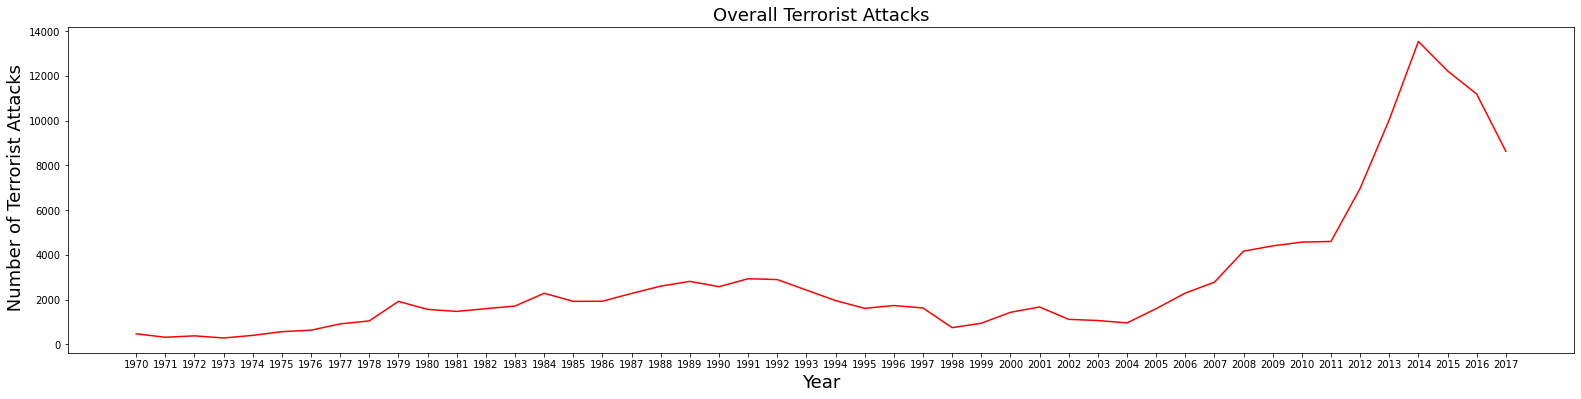

In [ ]:
# Year wise fluctations of confirmed(sure) Terrorist attacks 

output_data = grouped_data('Year of Attack',GTD_data)
plt.figure(figsize=(27,6))
plt.plot(output_data,color='red')
plt.xticks(np.arange(1970,2018,1))
plt.xlabel("Year",fontsize=18)
plt.ylabel(" Number of Terrorist Attacks",fontsize=18)
plt.title("Overall Terrorist Attacks",fontsize=18)
plt.show()



***2014 was the year with highest number of confirmed/sure terrorist attacks. I have considered data subset in which it is confirmed that those are terrorism attacks for sure.There was a sudden rise in terrorist attacks after 2011, it kept on increasing after 2011 and after 2014 again started declining.***






---



Text(0, 0.5, 'Region')

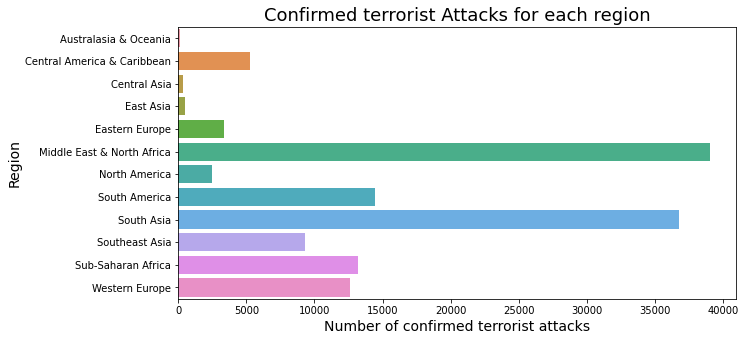

In [ ]:
# Calling function grouped_data to group  data using region and count sure terrorist attacks
# Plotting the count of overall confirmed terrorist attacks for each region

output_data = grouped_data('Region',GTD_data).to_frame()
l1 =[]
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(0,12):
  l1.append(output_data['Region'][i])
sns.barplot(x=l1,y=output_data.index,ax=ax)
plt.xlabel("Number of confirmed terrorist attacks",fontsize = 14)
plt.title("Confirmed terrorist Attacks for each region",fontsize = 18)
plt.ylabel("Region",fontsize = 14)


***Middle East and North Africa region has the highest number of confirmed terrorist attacks.Central Asia has lowest number of confirmed terrorist attacks***


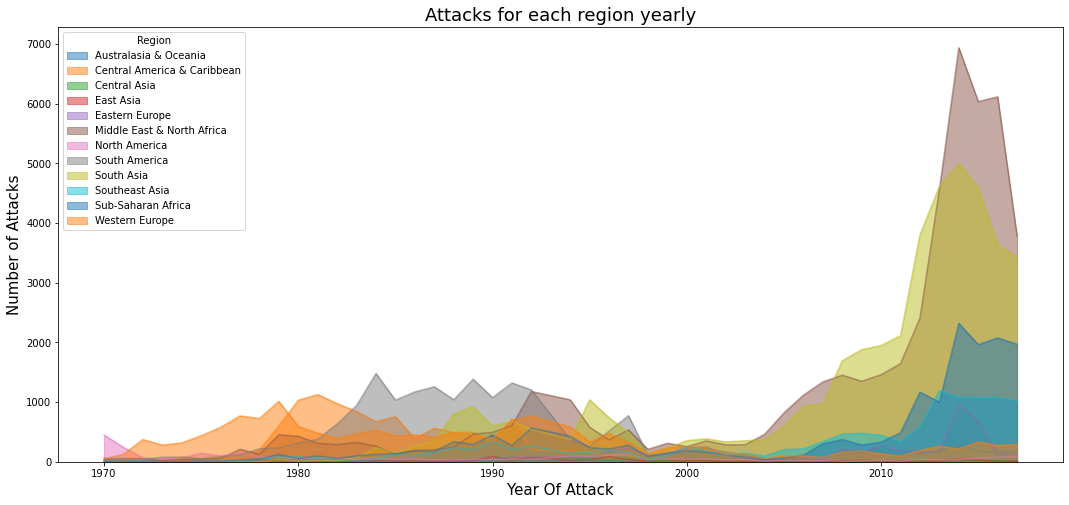

In [ ]:
pd.crosstab(GTD_data['Year of Attack'],GTD_data['Region']).plot(kind='area',stacked = False,figsize = (18,8))
plt.ylabel('Number of Attacks',fontsize=15)
plt.title("Attacks for each region yearly",fontsize=18)
plt.xlabel("Year Of Attack",fontsize=15)
plt.show()

***As years increased number of attacks increased and Attacks in Middle east and North Africa are maximum***

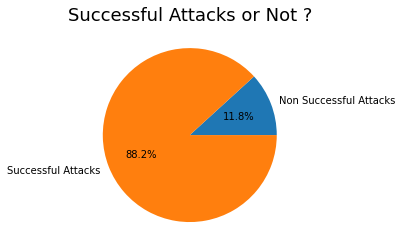

In [ ]:
#Checking that how many terrorrist attacks were successful

%matplotlib inline
output_data = grouped_data('Successful Attack',GTD_data).to_frame()
my_labels = ["Non Successful Attacks ","Successful Attacks"] 
plt.pie(output_data['Successful Attack'],labels=my_labels,autopct='%.1f%%')
plt.title("Successful Attacks or Not ?",fontsize = 18)
plt.show()

***There were approx. 88.2 % successful attacks and 11.8 % unsuccessful attacks***



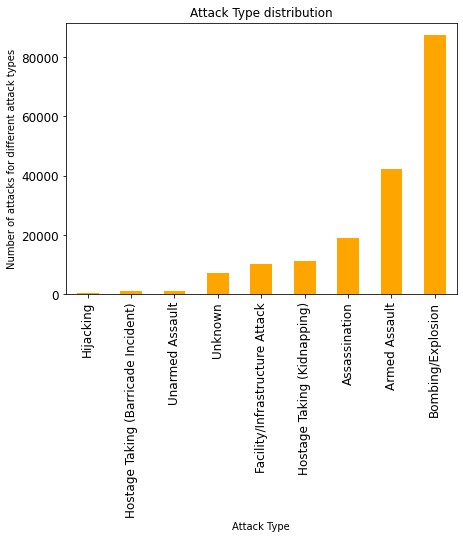

In [ ]:
# Checking the number of attacks for each attack type category

output_data = GTD_data.groupby(['Attack Type'])['Attack Type'].count()
output_data.sort_values().plot.bar(ylabel="Number of attacks for different attack types",figsize=(7,5),title="Attack Type distribution",fontsize=12,color="orange")


***Overall attacks were maximum for Bombing/explosion attack type*** 


In [ ]:
# function to check the attack types for different years pass year as variable

def attacks_graph(num):
  output_data = GTD_data.groupby(['Year of Attack','Attack Type'])['Attack Type'].count().to_frame()
  output_data.index = output_data.index.set_names(['Year_of_Attack', 'Attack_Type'])
  output_data.reset_index(inplace=True)
  output_data = output_data[(output_data['Year_of_Attack']) == num]
  output_data.rename(columns = {'Attack Type':'Number of attacks'},inplace= True)
  fig, ax = plt.subplots(figsize=(10, 6))
  sns.barplot(x=output_data['Year_of_Attack'],y=output_data['Number of attacks'],palette = "magma",hue=output_data['Attack_Type'],ax=ax).set(title="Attack type for year:"+str(num))

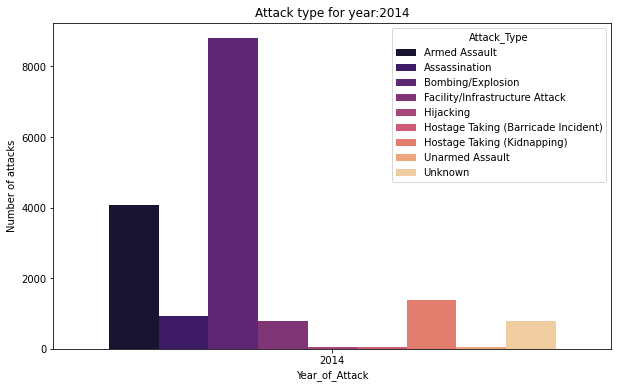

In [ ]:
# Calling function to analyse attack types for any particular year. Checking for 2014 year. In same way, we can pass any year to check

attacks_graph(2014)

***For year 2014, maximum attacks are of Bombing/explosion type followed by armed assault attack type***

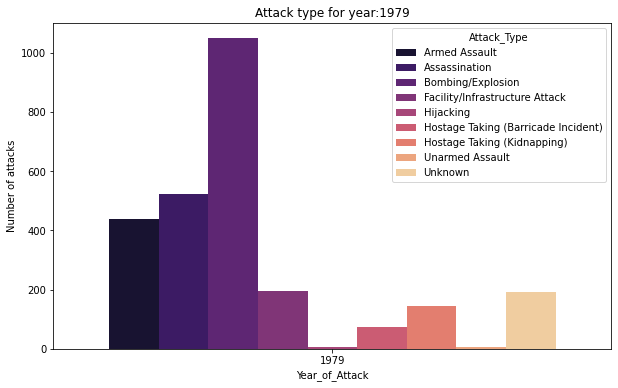

In [ ]:
# Calling function to analyse attack types for any particular year. Checking for 1979 year. In same way, we can pass any year to check

attacks_graph(1979)

***For year 1979, maximum attacks are of Bombing/explosion type followed by assassination attack type***

In [ ]:
# Combining confirmed data for prepetrator groups according to the number of attacks done.
# First considering date for which perpetrator groups are confirmed
# Considering perpetartor groups which were responsible for maximum number of attacks (more than 1500)

GTDdata = GTD_data[GTD_data['unconfirmed perpetrator group'] == 0]
perpetrator_groups = grouped_data('Perpetrator Group',GTDdata).to_frame()
perpetrator_groups = perpetrator_groups[perpetrator_groups['Perpetrator Group'] > 1500 ]
perpetrator_groups.index = perpetrator_groups.index.set_names(['perpetrator groups'])
perpetrator_groups.reset_index(inplace=True)
perpetrator_groups.rename(columns={'Perpetrator Group':'Number of attacks by perpetrator group'},inplace=True)
perpetrator_groups

,perpetrator groups,Number of attacks by perpetrator group
0,Al-Shabaab,1509
1,Basque Fatherland and Freedom (ETA),1589
2,Boko Haram,1579
3,Farabundo Marti National Liberation Front (FMLN),2115
4,Irish Republican Army (IRA),1780
5,Islamic State of Iraq and the Levant (ISIL),4115
6,New People's Army (NPA),1505
7,Shining Path (SL),3823
8,Taliban,5260
9,Unknown,61030


[Text(0.5, 1.0, 'Number of attacks group wise')]

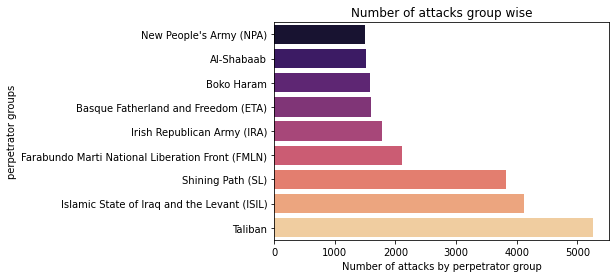

In [ ]:
# Removing those records for which perpetrator groups are unknown and plotting graph for rest

perpetrator_groups = perpetrator_groups[perpetrator_groups['perpetrator groups']!= "Unknown"]
perpetrator_groups = perpetrator_groups.sort_values(by=['Number of attacks by perpetrator group'])
sns.barplot(y=perpetrator_groups['perpetrator groups'],x=perpetrator_groups['Number of attacks by perpetrator group'],palette = "magma",dodge=False).set(title="Number of attacks group wise")

***Taliban is responsible for maximum number of attacks followed by ISIL***

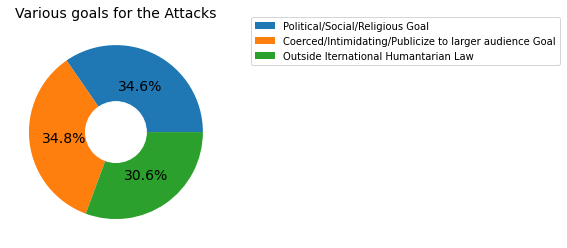

In [ ]:
# keeping the count of number of attacks pertaining to the goals for attack

psr_goal = GTD_data.groupby('Political/Social/Religious/social Goal')['Political/Social/Religious/social Goal'].count()[1]
cip_goal = GTD_data.groupby('Coerced/Intimidating/Publicize to larger audience Goal')['Coerced/Intimidating/Publicize to larger audience Goal'].count()[1]
oihl = GTD_data.groupby('Outside Iternational Humantarian Law')['Outside Iternational Humantarian Law'].count()[1]
x_arr=['Political/Social/Religious Goal','Coerced/Intimidating/Publicize to larger audience Goal','Outside Iternational Humantarian Law']
y_arr=[psr_goal,cip_goal,oihl]
plt.pie(y_arr,autopct='%.1f%%',textprops={'fontsize': 14})
circle = plt.Circle( (0,0), 0.35, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Various goals for the Attacks",fontsize = 14)
plt.legend(x_arr,bbox_to_anchor=(1.1, 1.05))
plt.show()

***Most of the attacks have goal of coerced/intimidating and publicize to larger audience goal closely followed by Political/social/religious goal and goals which have parameters Outside of International Humantarian law*** 

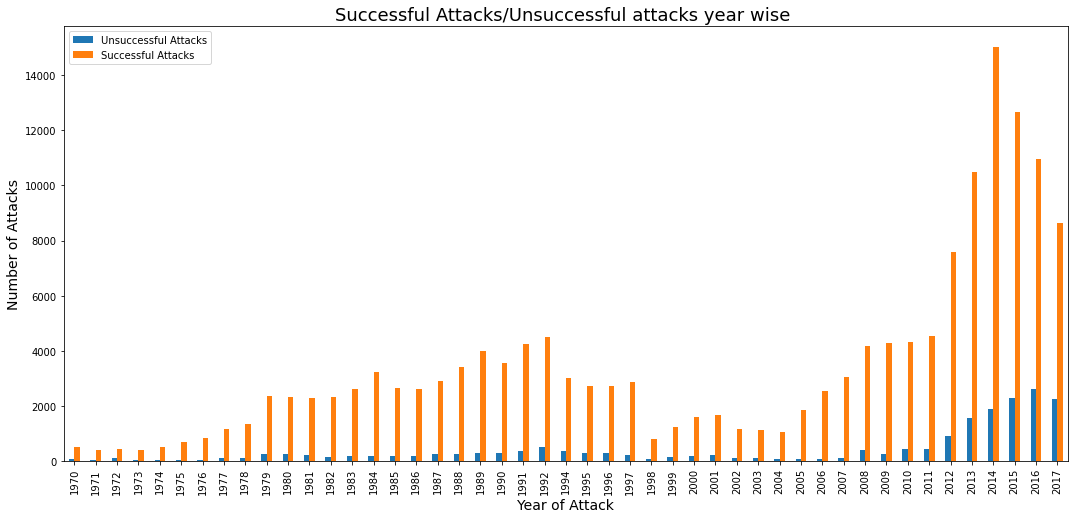

In [ ]:
# Checking successful and unsuccessful attacks yearly

pd.crosstab(GTD_data['Year of Attack'],GTD_data['Successful Attack']).plot(kind='bar',stacked = False,figsize = (18,8))
plt.xlabel("Year of Attack",fontsize=14)
plt.ylabel("Number of Attacks",fontsize=14)
plt.title("Successful Attacks/Unsuccessful attacks year wise ",fontsize= 18)
plt.legend(['Unsuccessful Attacks', 'Successful Attacks'])
plt.show()

***Very less attacks were unsuccessful***


---




In [ ]:
# checking nationality of the top targeted victims

output_data = grouped_data('Target/Victim Nationality',GTD_data).to_frame()
output_data.index = output_data.index.set_names(['Victim Nationality'])
output_data.reset_index(inplace=True)
output_data.rename(columns={'Target/Victim Nationality':'count of attacks'},inplace=True)
output_data = output_data[output_data['count of attacks']> 3000]
output_data

,Victim Nationality,count of attacks
0,Afghanistan,9469
35,Colombia,5739
79,India,9878
83,Iraq,21325
132,Nigeria,3384
138,Pakistan,11365
143,Peru,4914
144,Philippines,4878
189,Turkey,3026
194,United States,3365


In [ ]:
# checking Nationality of top targeted victims and including successful and unsuccessful attacks criteria as well

x = ['Afghanistan','Colombia','India','Iraq','Nigeria','Pakistan','Peru','Philippines','Turkey','United States']
GTD_data_selected = GTD_data[[t in x for t in GTD_data['Target/Victim Nationality']]]
output_data = GTD_data_selected.groupby(['Target/Victim Nationality','Successful Attack'])['Successful Attack'].count().to_frame()
output_data.index = output_data.index.set_names(['Victim Nationality', 'Successful/Unsuccessful attack'])
output_data.reset_index(inplace=True)
output_data.rename(columns = {'Successful Attack':'Number of attacks'},inplace= True)
output_data

,Victim Nationality,Successful/Unsuccessful attack,Number of attacks
0,Afghanistan,0,1112
1,Afghanistan,1,9677
2,Colombia,0,563
3,Colombia,1,7346
4,India,0,1689
5,India,1,10375
6,Iraq,0,2751
7,Iraq,1,21307
8,Nigeria,0,309
9,Nigeria,1,3445


Text(0.5, 1.0, 'Nationality of Top Targeted Victims')

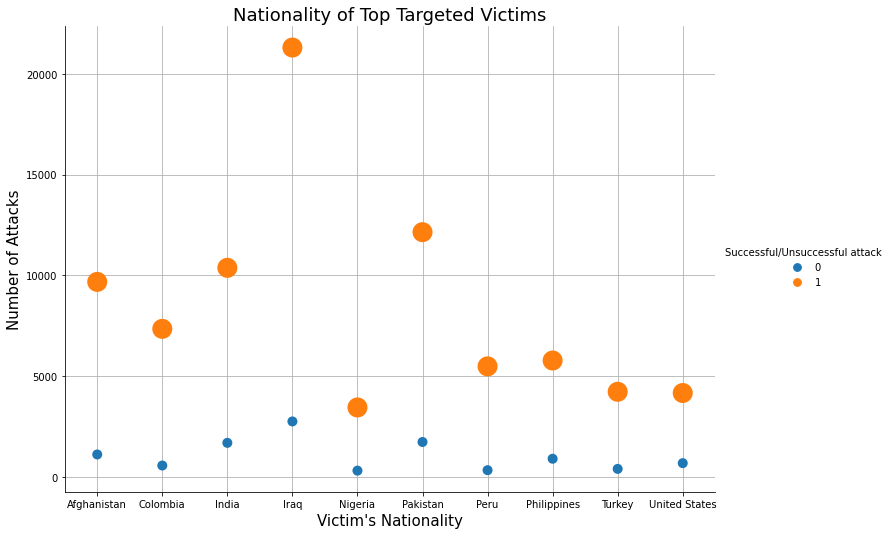

In [ ]:
# 0 represents unsusccesful attacks and 1 represents successful attacks in the graph

sns.catplot(x="Victim Nationality", y="Number of attacks", kind="swarm",height=7,hue = "Successful/Unsuccessful attack",sizes=(100, 400),aspect=10/7, data=output_data)
plt.grid()
plt.xlabel("Victim's Nationality",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.title("Nationality of Top Targeted Victims",fontsize=18)

***Iraq's citizens  has faced high number of successful attacks followed by Pakistan and India***


In [ ]:
# Fatalities count for different region

GTD_data_selected = GTD_data[GTD_data['Fatalities count']>0]
GTD_data_selected = GTD_data_selected.groupby(['Region'])['Fatalities count'].sum().to_frame()
GTD_data_selected.reset_index(inplace = True)

[Text(0.5, 1.0, 'Fatalities count of perpetrators and victims combined')]

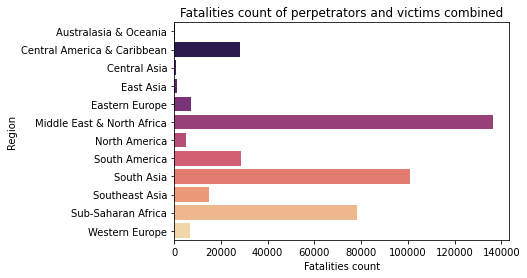

In [ ]:
# Plotting graph for fatalaties count,injured victims and injured perpetarators count region wise
sns.barplot(y=GTD_data_selected['Region'],x=GTD_data_selected['Fatalities count'],palette = "magma",dodge=False).set(title="Fatalities count of perpetrators and victims combined")

***Middle East and North Africa region had maximum number of fatalaties followed by South Asia***



In [ ]:
# Since Middle East,North Africa and South Asia region showed high number of fatalities. Let's check out the number of fatalities for the countries lying in this region
GTD_data_selected = GTD_data[((GTD_data['Region'] == "Middle East & North Africa")  | (GTD_data['Region'] == "South Asia")) & (GTD_data['Fatalities count'] > 0)]
Fatalities_count_country = GTD_data_selected.groupby(['Country'])['Fatalities count'].sum().to_frame()
Fatalities_count_country.reset_index(inplace=True)

Text(0.5, 1.0, 'Country wise Fatalities count for specific region(Middle East, North Africa and south Asia region)')

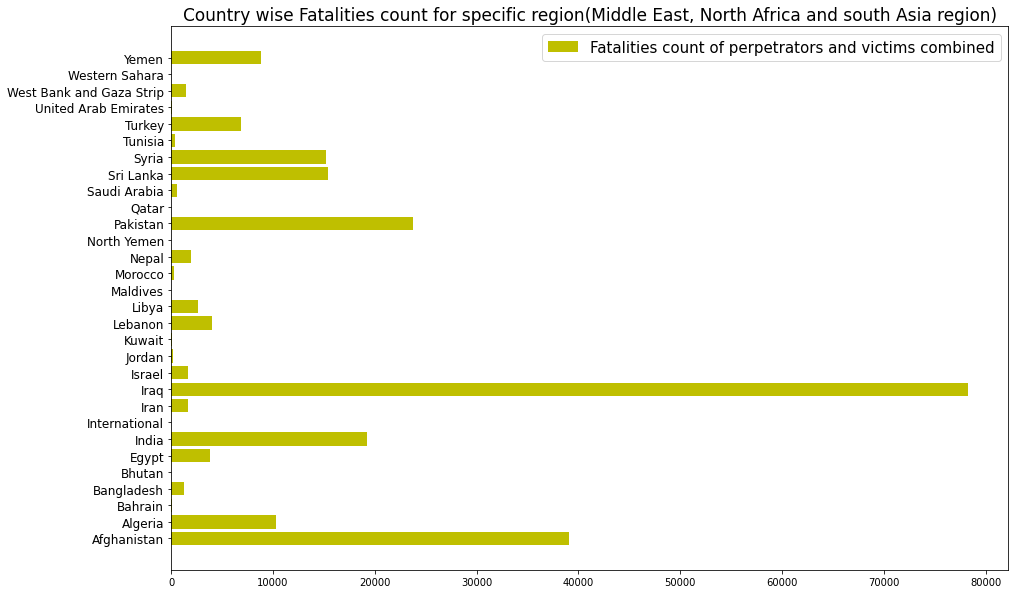

In [ ]:
# Plotting graph for fatalities count country wise for region Middle East, North Africa and south Asia region
plt.barh(Fatalities_count_country['Country'], Fatalities_count_country['Fatalities count'],color='y',label = "Fatalities count of perpetrators and victims combined")
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.legend(fontsize=15)
plt.yticks(fontsize=12)
plt.title("Country wise Fatalities count for specific region(Middle East, North Africa and south Asia region)",fontsize=17,horizontalalignment= 'center') 

***Iraq,Afghanistan, Pakistan, India has more fatalities count for Middle East, North Africa and South Asia region***


In [ ]:
# checking successful and unsuccessful suicide Attacks count region wise

GTD_data_select = GTD_data[(GTD_data['Suicide Attack']==1)]
GTD_data_select = GTD_data_select.groupby(['Region','Successful Attack'])['Suicide Attack'].sum().to_frame()
GTD_data_select.reset_index(inplace = True)
GTD_data_select.replace({'Successful Attack': {0: 'Unsuccessful Attack', 1: 'Successful Attack'}},inplace = True)
GTD_data_select.rename(columns={'Successful Attack':'Category','Suicide Attack':'Suicide Attack count'},inplace= True)
GTD_data_select

,Region,Category,Suicide Attack count
0,Australasia & Oceania,Unsuccessful Attack,1
1,Central America & Caribbean,Successful Attack,1
2,Central Asia,Unsuccessful Attack,1
3,Central Asia,Successful Attack,10
4,East Asia,Unsuccessful Attack,1
5,East Asia,Successful Attack,16
6,Eastern Europe,Unsuccessful Attack,6
7,Eastern Europe,Successful Attack,81
8,Middle East & North Africa,Unsuccessful Attack,663
9,Middle East & North Africa,Successful Attack,3099


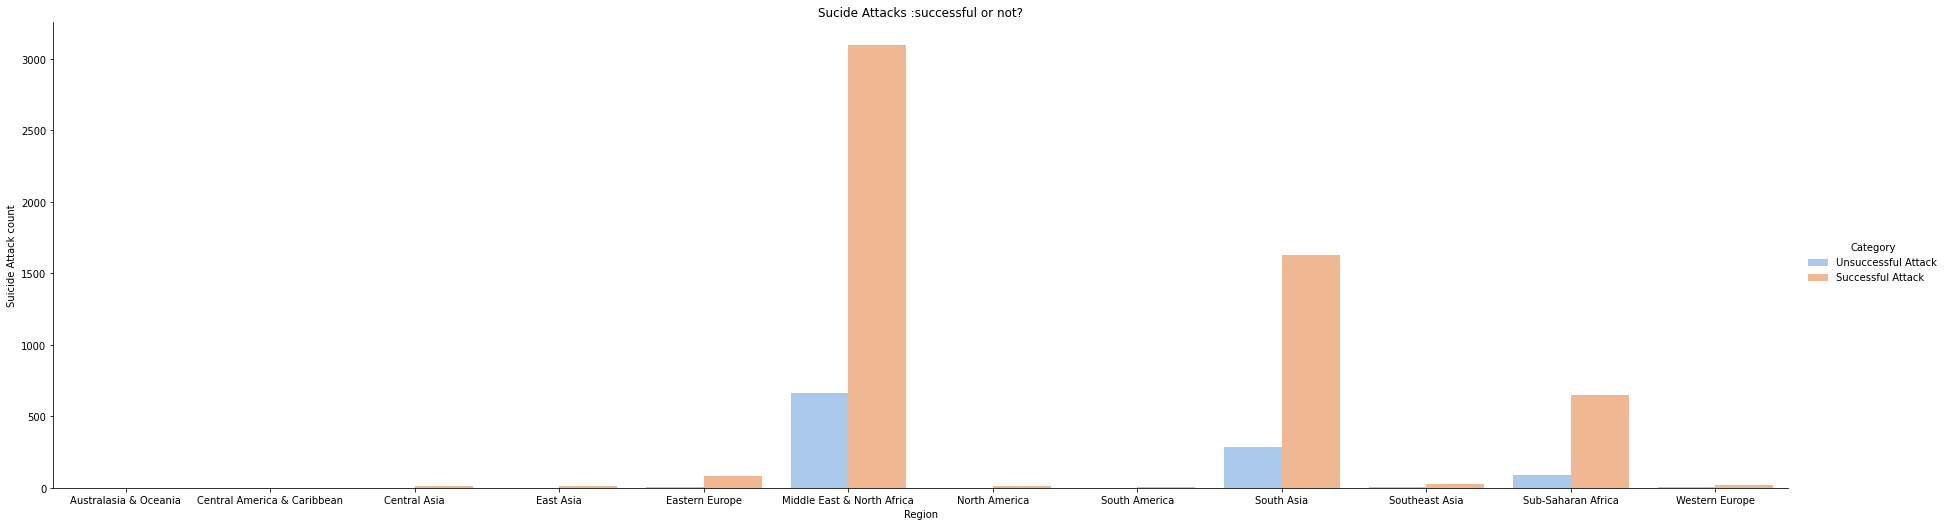

In [ ]:
# Plotting successful and unsuccessful suicide Attacks count region wise

sns.catplot(x='Region',y='Suicide Attack count',data=GTD_data_select,hue='Category',palette = 'pastel',aspect=25/7,height = 7,kind='bar').set(title='Sucide Attacks :successful or not?')

***Middle East , North Africa ,South Asia North Africa has high number of suicide attacks. Also, observe that in all cases mostly suicide attacks were successful***


In [ ]:
output_data = grouped_data('Target type',GTD_data).to_frame()
output_data.rename(columns={'Target type':'Attacks count'},inplace= True)
output_data.reset_index(inplace=True)
output_data

,Target type,Attacks count
0,Abortion Related,229
1,Airports & Aircraft,1059
2,Business,15801
3,Educational Institution,3912
4,Food or Water Supply,287
5,Government (Diplomatic),2981
6,Government (General),19559
7,Journalists & Media,2554
8,Maritime,296
9,Military,4728


[Text(0.5, 1.0, 'Target Type count')]

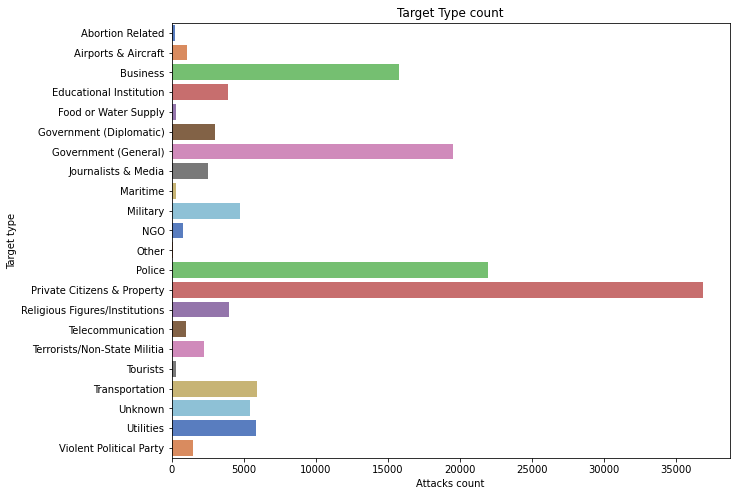

In [ ]:
#Checking the most common target type

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y=output_data['Target type'],x=output_data['Attacks count'],palette = "muted",ax=ax).set(title="Target Type count")

***Private Citizens and property , Police , Government(General), Business are the top 4 most common target types*** 



## **Want to know how target type differs country wise!!**
**Well, a function is created below to compare target type count for any 2 countries.Let's try this out !!**


In [ ]:
# Function to compare target types for two countries

def common_targettype(country,ax1):
  GTD_data_select = GTD_data[GTD_data['Country'] == country]
  output_data = grouped_data('Target type',GTD_data_select).to_frame()
  output_data.rename(columns={'Target type':'Attacks count'},inplace= True)
  output_data.reset_index(inplace=True)
  # fig, ax = plt.subplots(figsize=(10, 8))
  sns.barplot(y=output_data['Target type'],x=output_data['Attacks count'],palette = "viridis",ax=ax1).set(title=f"Target Type count for {country}") 

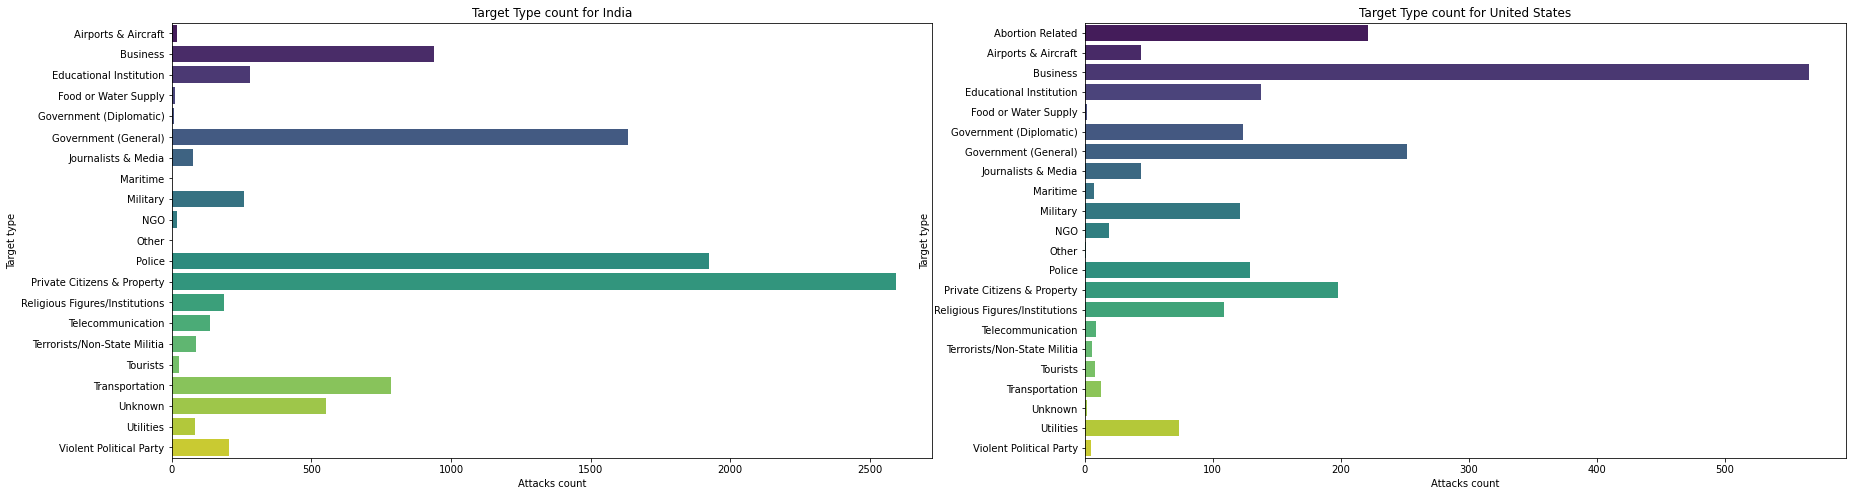

In [ ]:
#Comparing India and United States target type count to understand which target type was mostly attacked

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(30,8))
common_targettype("India",ax1)
common_targettype("United States",ax2)

***Private Citizens & property is the most targeted category for India and Business is the most targetted category for United States***

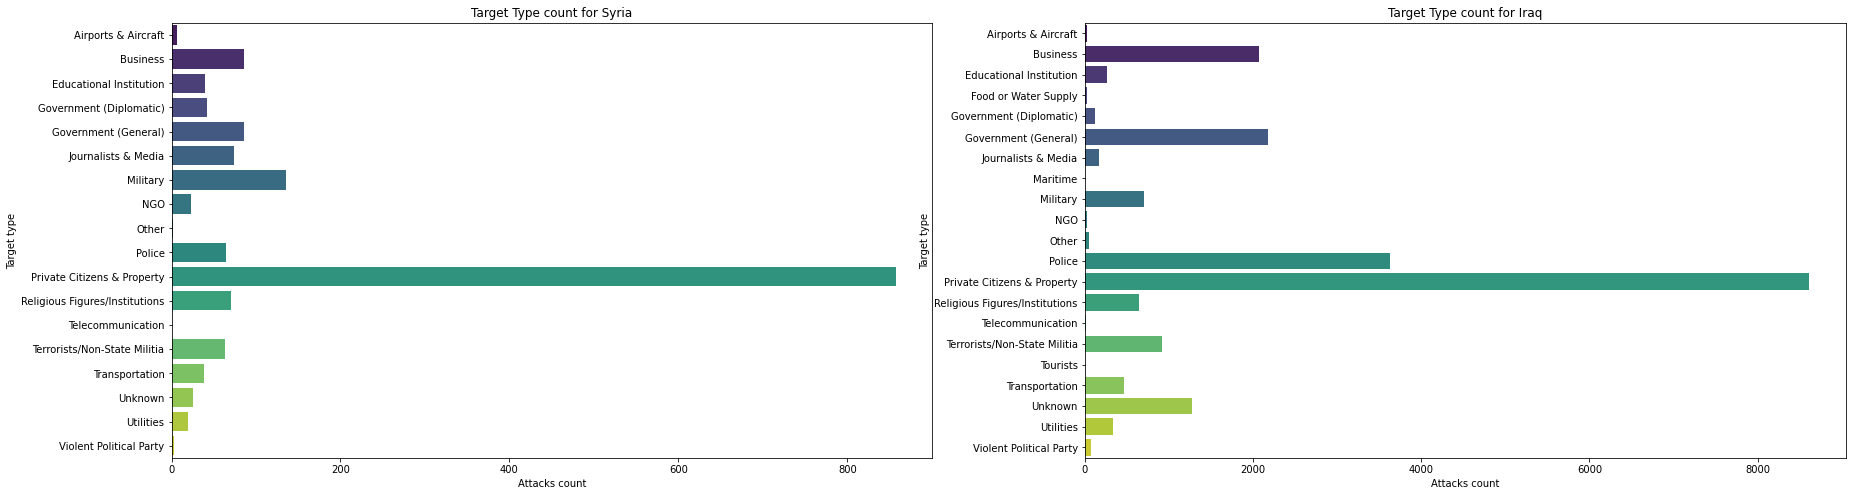

In [ ]:
#Comparing Syria and Iraq target type count to understand which target type was mostly attacked

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(30,8))
common_targettype("Syria",ax1)
common_targettype("Iraq",ax2)

***Syria and Iraq have private Citizens & property as most targeted category. Private Citizens and property were affected most due to the attacks in Syria and Iraq.***

In [ ]:
# Checking how the attacks pertaining to certain goals/motive increased over years

GTD_data_selected = GTD_data[GTD_data['Political/Social/Religious/social Goal']>=0]
GTD_data_selected = GTD_data_selected.groupby(['Year of Attack'])['Political/Social/Religious/social Goal'].sum().to_frame()
GTD_data_selected.reset_index(inplace = True)
GTD_data_selected1 = GTD_data[GTD_data['Coerced/Intimidating/Publicize to larger audience Goal']>=0]
GTD_data_selected1 = GTD_data_selected1.groupby(['Year of Attack'])['Coerced/Intimidating/Publicize to larger audience Goal'].sum().to_frame()
GTD_data_selected1.reset_index(inplace = True)
GTD_data_selected2 = GTD_data[GTD_data['Outside Iternational Humantarian Law']>=0]
GTD_data_selected2 = GTD_data_selected2.groupby(['Year of Attack'])['Outside Iternational Humantarian Law'].sum().to_frame()
GTD_data_selected2.reset_index(inplace = True)
print("Total attacks for Political/Social/Religious/social Goal:  "+ str(GTD_data_selected['Political/Social/Religious/social Goal'].sum()))
print("Total attacks for Coerced/Intimidating/Publicize to larger audience Goal: "+str(GTD_data_selected1['Coerced/Intimidating/Publicize to larger audience Goal'].sum()))
print("Total attacks which are Outside Iternational Humantarian Law: "+str(GTD_data_selected2['Outside Iternational Humantarian Law'].sum()))

Total attacks for Political/Social/Religious/social Goal:  177606
Total attacks for Coerced/Intimidating/Publicize to larger audience Goal: 178420
Total attacks which are Outside Iternational Humantarian Law: 157229


Text(0.5, 1.0, ' Goals/Motives behind the attacks for changing years')

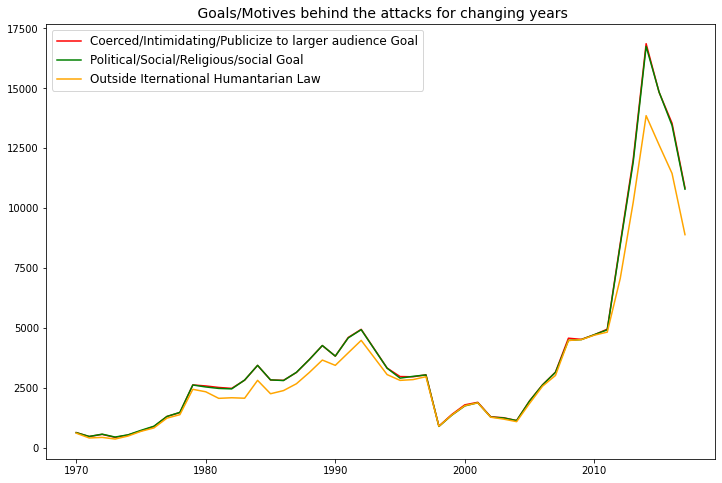

In [ ]:
plt.plot(GTD_data_selected1['Year of Attack'], GTD_data_selected1['Coerced/Intimidating/Publicize to larger audience Goal'],color='red',label= "Coerced/Intimidating/Publicize to larger audience Goal")
plt.plot(GTD_data_selected['Year of Attack'], GTD_data_selected['Political/Social/Religious/social Goal'],color='green',label = "Political/Social/Religious/social Goal")
plt.plot(GTD_data_selected2['Year of Attack'], GTD_data_selected2['Outside Iternational Humantarian Law'],color="orange",label="Outside Iternational Humantarian Law")
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.legend(fontsize=12)
plt.title(" Goals/Motives behind the attacks for changing years",fontsize=14)

***As the year increases, the attacks having different motives/goals increases too. Also we can observe that Coerced/Intimidating/Publicize to larger audience Goal and Political/Social/Religious/social Goal are almost same in number and coinciding as well. We have more attacks related to Coerced/Intimidating/Publicize to larger audience Goal and Political/Social/Religious/social Goal. This shows how much politics and religion is being used as a manipulative and conflicting tool for the attacks***

In [ ]:
# checking the attack's count category wise whether attacks are International logistical,International Ideological or International Miscellaneous for different regions

GTD_data_selected = GTD_data[GTD_data['International Logistical Attack']>=0]
GTD_data_selected = GTD_data_selected.groupby(['Region'])['International Logistical Attack'].sum().to_frame()
GTD_data_selected.reset_index(inplace = True)
GTD_data_selected1 = GTD_data[GTD_data['International Ideological Attack']>=0]
GTD_data_selected1 = GTD_data_selected1.groupby(['Region'])['International Ideological Attack'].sum().to_frame()
GTD_data_selected1.reset_index(inplace = True)
GTD_data_selected2 = GTD_data[GTD_data['International Miscellaneous Attack']>=0]
GTD_data_selected2 = GTD_data_selected2.groupby(['Region'])['International Miscellaneous Attack'].sum().to_frame()
GTD_data_selected2.reset_index(inplace = True)
print("International Logistical Attack:  "+ str(GTD_data_selected['International Logistical Attack'].sum()))
print("International Ideological Attack: "+str(GTD_data_selected1['International Ideological Attack'].sum()))
print("International Miscellaneous Attack: "+str(GTD_data_selected2['International Miscellaneous Attack'].sum()))

International Logistical Attack:  7069
International Ideological Attack: 22617
International Miscellaneous Attack: 20524


[Text(0.5, 1.0, 'International Miscellaneous Attacks')]

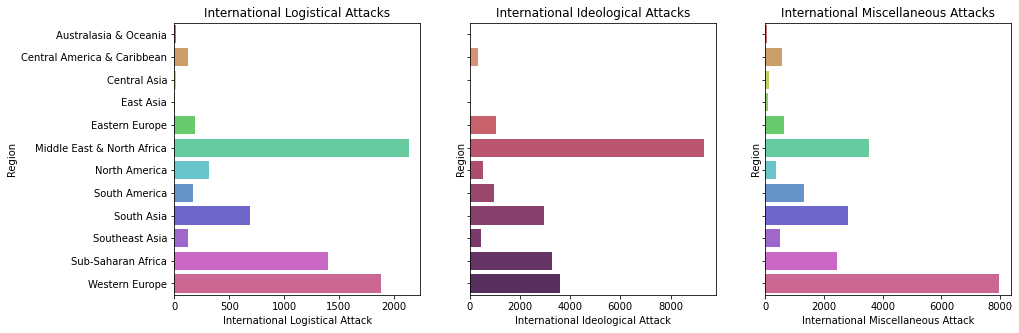

In [ ]:
# checking the attack's count category wise whether attacks are International logistical,International Ideological or International Miscellaneous for different regions

fig, (ax1, ax2,ax3) = plt.subplots(ncols=3,figsize=(15,5),sharey=True)
sns.barplot(y=GTD_data_selected['Region'],x=GTD_data_selected['International Logistical Attack'],palette = "hls",ax=ax1).set(title=f"International Logistical Attacks") 
sns.barplot(y=GTD_data_selected1['Region'],x=GTD_data_selected1['International Ideological Attack'],palette = "flare",ax=ax2).set(title=f"International Ideological Attacks") 
sns.barplot(y=GTD_data_selected2['Region'],x=GTD_data_selected2['International Miscellaneous Attack'],palette = "hls",ax=ax3).set(title=f"International Miscellaneous Attacks") 

***Middle East and North Africa region has maximum number of attacks belonging to International Logistics Attacks category as compared to other regions. International Logistics Attacks category indicates that nationality of the perpetrator group differs from the location of the attack.***

***Middle East and North Africa region has maximum number of attacks belonging to International Ideological Attacks category as compared to other regions. International Ideological  Attacks category indicates that the nationality of the perpetrator group differs from the nationality of the targeted victims***


***Western Europe region has maximum number of attacks belonging to International Miscellaneous Attacks category as compared to other regions. International Miscellaneous Attacks category indicates that the location of the attack differs from the nationality of the target(s)/victim(s).***


In [ ]:
# Checking weapon type count for various regions

GTD_data_selected = GTD_data[GTD_data['Weapon Type']!= 'Unknown']
GTD_data_selected = GTD_data_selected.groupby(['Region','Weapon Type'])['Weapon Type'].count().to_frame()
GTD_data_selected.rename(columns={'Weapon Type' : 'weapon type count'},inplace=True)
GTD_data_selected.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; yo

Text(0.5, 1.0, 'Region wise weapon type count')

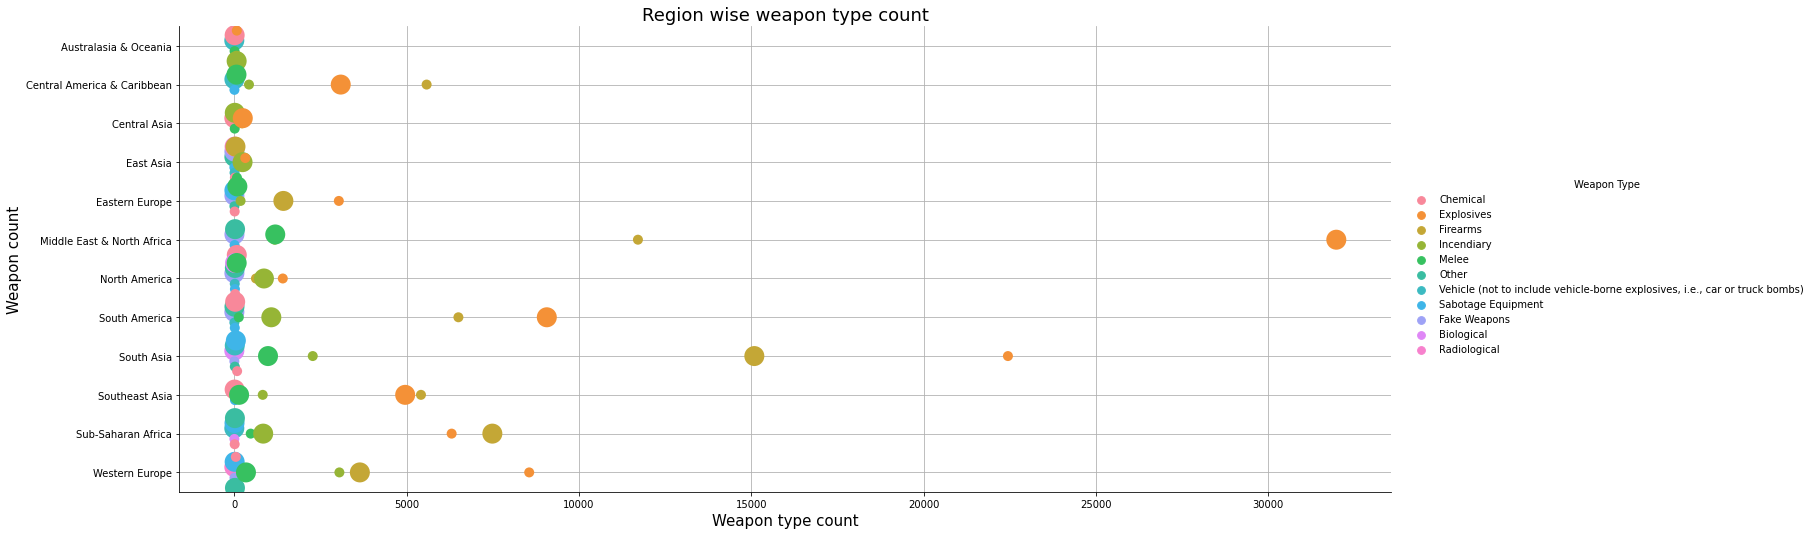

In [ ]:
%matplotlib inline
sns.catplot(x="weapon type count", y="Region", kind="swarm",height=7,hue = "Weapon Type",sizes=(100, 400),aspect=20/7, data=GTD_data_selected)
plt.grid()
plt.xlabel("Weapon type count",fontsize=15)
plt.ylabel("Weapon count",fontsize=15)
plt.title("Region wise weapon type count",fontsize=18)

***We can see various type of weapons and their corresponding count for different regions. In Middle East and North Africa and South Asia, explosives are being used for maximum of attacks. We can observe that for all regions explosives are used for maximum of attacks followed by firearms***

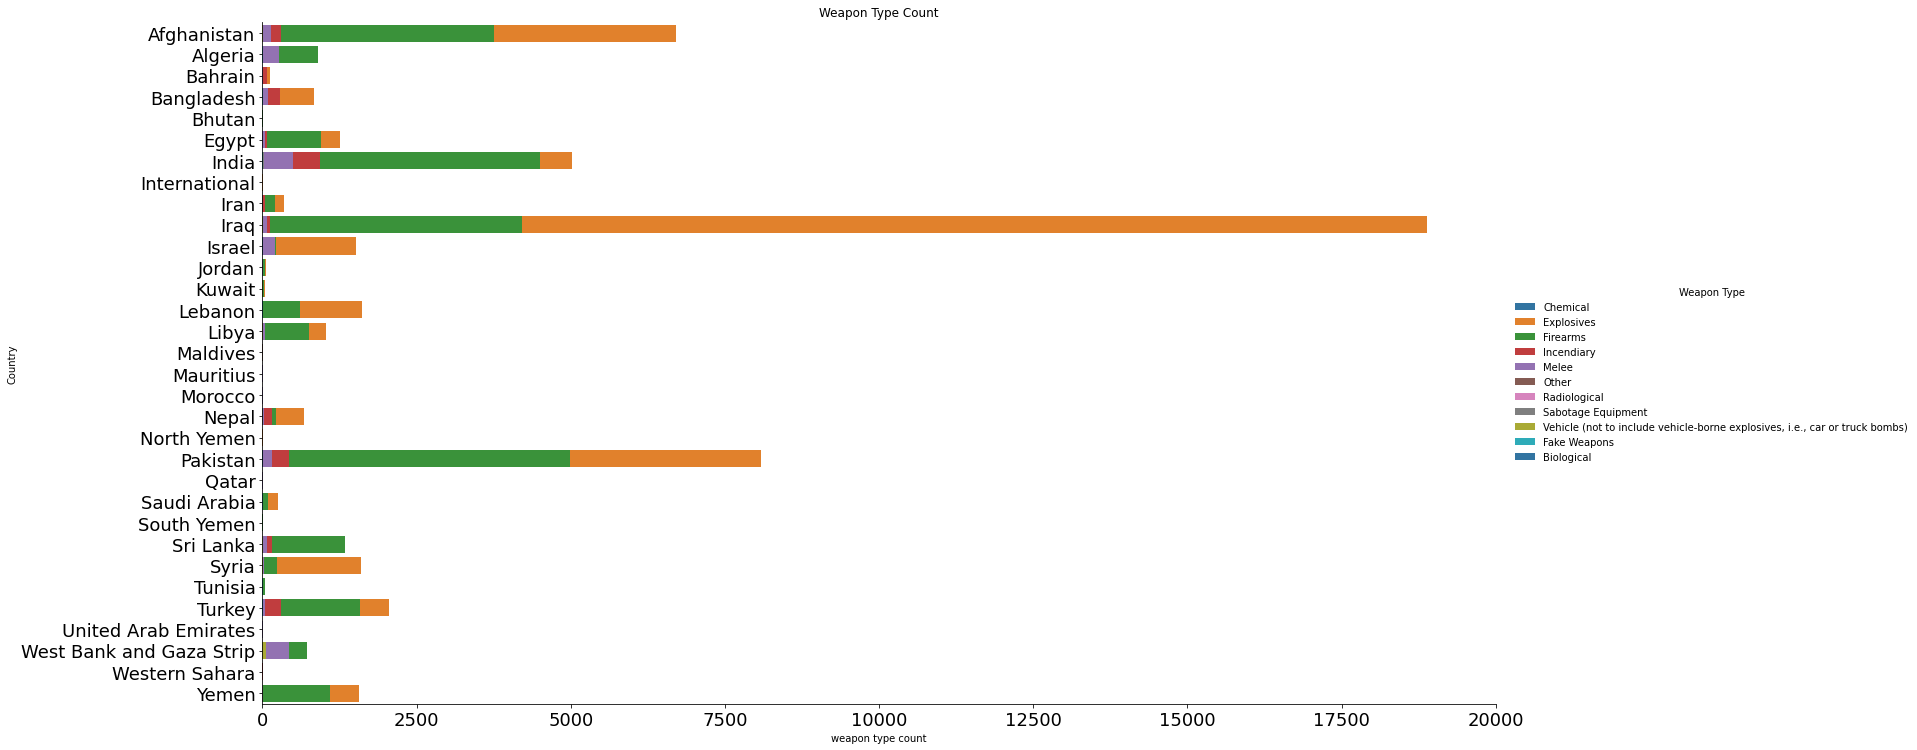

In [ ]:
# Checking weapon types for different countries in Middle East, North Africa and South Asia Region 

GTD_data_selected = GTD_data[(GTD_data['Weapon Type']!= 'Unknown')& ((GTD_data['Region'] == 'Middle East & North Africa')|(GTD_data['Region'] == 'South Asia'))]
GTD_data_selected = GTD_data_selected.groupby(['Country','Weapon Type'])['Weapon Type'].count().to_frame()
GTD_data_selected.rename(columns={'Weapon Type' : 'weapon type count'},inplace=True)
GTD_data_selected.reset_index(inplace=True)
b = sns.catplot(x='weapon type count',y='Country',data=GTD_data_selected,hue='Weapon Type',palette = 'tab10',aspect=2,height= 10,kind='bar',dodge=False).set(title='Weapon Type Count')
b.set_yticklabels(size = 18)
b.set_xticklabels(size = 18)

***In Middle East,North Africa and South Asia region, Iraq, Pakistan, Afghanistan  and India are the countries which uses maximum number of explosives and firearms as compared to other countries in that region as the attacks are also maximum in these countires.***


[Text(0.5, 1.0, 'Percentage of captured perpetrators region wise')]

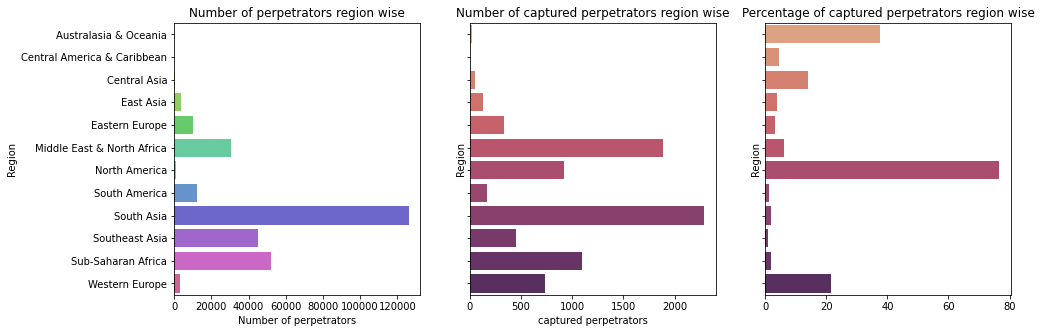

In [ ]:
# Plotting graphs for total perpetrators and captured perpetrators count region wise

GTD_data_selected = GTD_data[(GTD_data['Region']!= 'Unknown') &(GTD_data['captured perpetrators']>=0)&(GTD_data['Number of perpetrators']>=0)]
GTD_data_selected = GTD_data_selected.groupby('Region').agg({'captured perpetrators':sum ,'Number of perpetrators':sum})
GTD_data_selected.reset_index(inplace=True)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3,figsize=(15,5),sharey=True)
sns.barplot(y=GTD_data_selected['Region'],x=GTD_data_selected['Number of perpetrators'],palette = "hls",ax=ax1).set(title="Number of perpetrators region wise") 
sns.barplot(y=GTD_data_selected['Region'],x=GTD_data_selected['captured perpetrators'],palette = "flare",ax=ax2).set(title="Number of captured perpetrators region wise") 
sns.barplot(y=GTD_data_selected['Region'],x=(GTD_data_selected['captured perpetrators']/GTD_data_selected['Number of perpetrators'])*100,palette = "flare",ax=ax3).set(title="Percentage of captured perpetrators region wise") 

***On comparing first two graphs,it can be observed that captured perpetrators are very less as compared to total number of perpetrators region wise. Also, we are checking the percentage of captured perpetrators for each region, so that we get an idea that which region was able to capture more perpetrators according to the attacks that took place in that region. North America has highest percentage for captured perpetrators. It indicates that in North America region,percentage of perpetrators that were captured out of the total number of perpetrators that attacked in that region was maximum.***

# **Key findings related to terrorist activities in India.**

## **Overall Terrrorist attacks fluctuations over different years for India.**

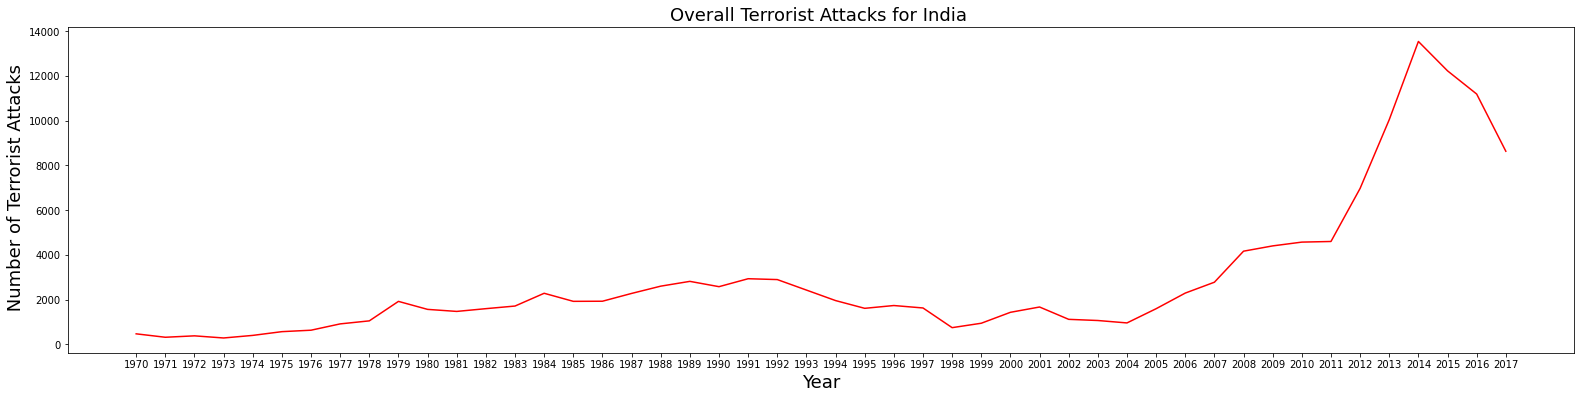

In [ ]:
# Year wise fluctations in terrorist attack count for India

GTD_data_country = GTD_data[(GTD_data['Country'] == 'India')]
output_data = grouped_data('Year of Attack',GTD_data)
plt.figure(figsize=(27,6))
plt.plot(output_data,color='red')
plt.xticks(np.arange(1970,2018,1))
plt.xlabel("Year",fontsize=18)
plt.ylabel(" Number of Terrorist Attacks",fontsize=18)
plt.title("Overall Terrorist Attacks for India ",fontsize=18)
plt.show()

***This shows almost same fluctuations as terrorist attacks that occurred overall World***

## **Were all attacks successful in India?**

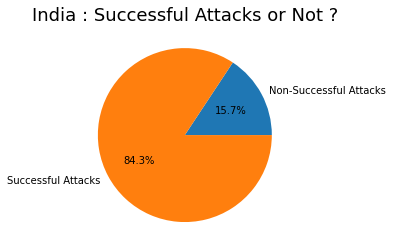

In [ ]:
# Checking successful and unsuccessful attacks percentage in India

GTD_data_country = GTD_data[(GTD_data['Country'] == 'India')]
output_data = grouped_data('Successful Attack',GTD_data_country).to_frame()
my_labels = ["Non-Successful Attacks ","Successful Attacks"] 
plt.pie(output_data['Successful Attack'],labels=my_labels,autopct='%.1f%%')
plt.title("India : Successful Attacks or Not ?",fontsize = 18)
plt.show()

***This shows the success rate for these attacks in India. We have failed to prevent such attacks clearly.***

## **Let's check out the fatalities count for different cities in India!!**
**Let's try to find out the cities in India, which were impacted to high extent.**

Text(0.5, 1.0, 'City wise falatalities count for India')

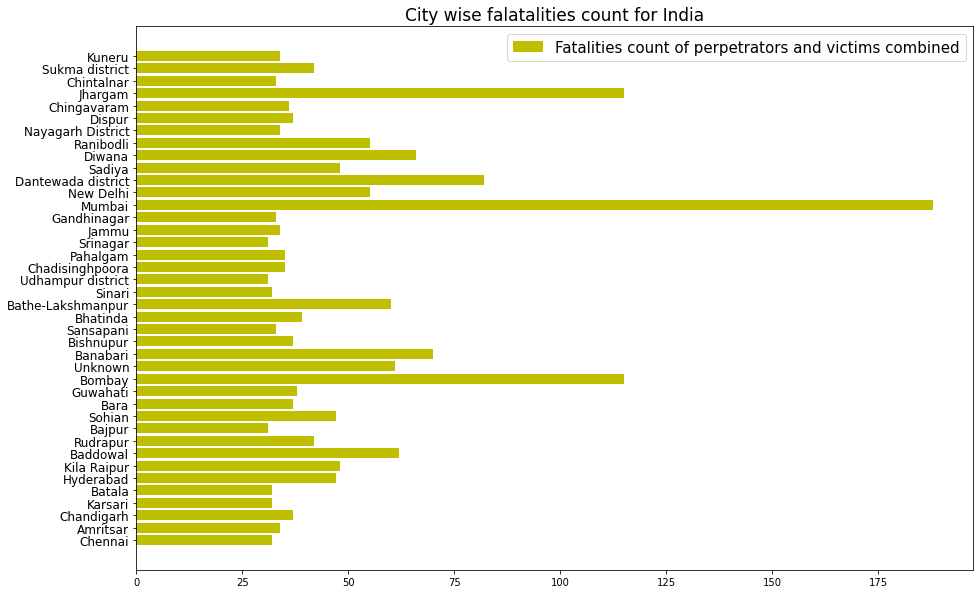

In [ ]:
# Fatalities count for various cities in India. Considering 30 as the minimum count for fatalities as there are lot of cities

GTD_data_country = GTD_data[(GTD_data['Country'] == 'India') & (GTD_data['Fatalities count'] > 30)]
plt.barh(GTD_data_country['city'], GTD_data_country['Fatalities count'],color='y',label = "Fatalities count of perpetrators and victims combined")
fig = plt.gcf()
fig.set_size_inches(15,10 )
plt.legend(fontsize=15)
plt.yticks(fontsize=12)
plt.title("City wise falatalities count for India",fontsize=17,horizontalalignment= 'center') 

***Mumbai has the highest fatalities count in India*** 

## **Which terrorist group was most active in India after year 2000 ?**
**Let's plot a simple bargraph to check the same**

[Text(0.5, 1.0, 'Number of attacks group wise for India')]

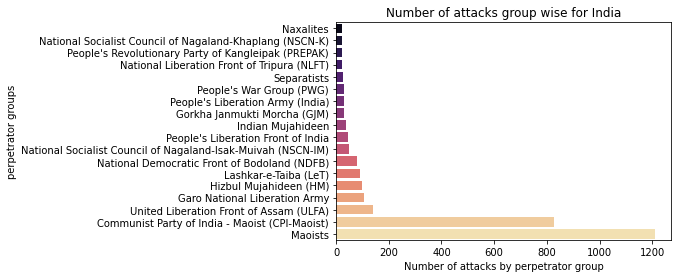

In [ ]:
# Most active attack group in India after 2000
# Considering perpetartor groups which were responsible for more than 20 attacks

GTDdata = GTD_data[(GTD_data['unconfirmed perpetrator group'] == 0) & (GTD_data['Country'] == 'India') & (GTD_data['Year of Attack'] > 2000)]
perpetrator_groups = grouped_data('Perpetrator Group',GTDdata).to_frame()
perpetrator_groups = perpetrator_groups[perpetrator_groups['Perpetrator Group'] > 20 ]
perpetrator_groups.index = perpetrator_groups.index.set_names(['perpetrator groups'])
perpetrator_groups.reset_index(inplace=True)
perpetrator_groups.rename(columns={'Perpetrator Group':'Number of attacks by perpetrator group'},inplace=True)
perpetrator_groups
perpetrator_groups = perpetrator_groups[perpetrator_groups['perpetrator groups']!= "Unknown"]
perpetrator_groups = perpetrator_groups.sort_values(by=['Number of attacks by perpetrator group'])
sns.barplot(y=perpetrator_groups['perpetrator groups'],x=perpetrator_groups['Number of attacks by perpetrator group'],palette = "magma",dodge=False).set(title="Number of attacks group wise for India")

***This shows the most active groups in India which attacked India maximum times after year 2000. Clearly, Maoists are leading by huge margin!***

## **Distribution of goals pertaining to different attacks in India.**

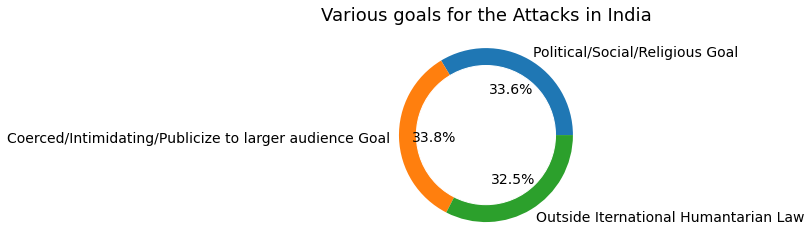

In [ ]:
# Finding the motive behind the attacks in India

GTD_data_country = GTD_data[(GTD_data['Country'] == 'India')]
psr_goal = GTD_data_country.groupby('Political/Social/Religious/social Goal')['Political/Social/Religious/social Goal'].count()[1]
cip_goal = GTD_data_country.groupby('Coerced/Intimidating/Publicize to larger audience Goal')['Coerced/Intimidating/Publicize to larger audience Goal'].count()[1]
oihl = GTD_data_country.groupby('Outside Iternational Humantarian Law')['Outside Iternational Humantarian Law'].count()[1]
x_arr=['Political/Social/Religious Goal','Coerced/Intimidating/Publicize to larger audience Goal','Outside Iternational Humantarian Law']
y_arr=[psr_goal,cip_goal,oihl]
plt.pie(y_arr,labels=x_arr,autopct='%.1f%%',textprops={'fontsize': 14})
circle = plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Various goals for the Attacks in India",fontsize = 18)
plt.show()

***Coerced/Intimidating/Publicize to larger audience goal and political/Social/Religious goals are almost equally responsible for the attacks in India. Well, Using religion as justification for these attacks is not new.***

# **Conclusion**

**All the inferences have been mentioned after each graph. GTD helped us to derive various useful key findings pertaining to the data. Python libraries provided us with the visualization techniques to understand the outcomes in a more better way.**